In [0]:
import warnings
warnings.filterwarnings("ignore")

get_ipython().run_line_magic('reload_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')
get_ipython().run_line_magic('matplotlib', 'inline')

import os
from fastai import *
from fastai.vision import *

mv: cannot move 'kaggle.json' to '/root/.kaggle/': Not a directory
Archive:  Youtube_Viral_data_scraper-master.zip
   creating: Youtube_Viral_data_scraper-master/does_well/
  inflating: Youtube_Viral_data_scraper-master/does_well/Buzzfeed1022.jpg  
  inflating: Youtube_Viral_data_scraper-master/does_well/Buzzfeed1044.jpg  
 extracting: Youtube_Viral_data_scraper-master/does_well/Buzzfeed1057.jpg  
  inflating: Youtube_Viral_data_scraper-master/does_well/Buzzfeed1065.jpg  
  inflating: Youtube_Viral_data_scraper-master/does_well/Buzzfeed1068.jpg  
  inflating: Youtube_Viral_data_scraper-master/does_well/Buzzfeed1069.jpg  
  inflating: Youtube_Viral_data_scraper-master/does_well/Buzzfeed1135.jpg  
 extracting: Youtube_Viral_data_scraper-master/does_well/Buzzfeed1167.jpg  
  inflating: Youtube_Viral_data_scraper-master/does_well/Buzzfeed119.jpg  
  inflating: Youtube_Viral_data_scraper-master/does_well/Buzzfeed1197.jpg  
  inflating: Youtube_Viral_data_scraper-master/does_well/Buzzfeed122

['does_well', 'not_viral', 'viral']

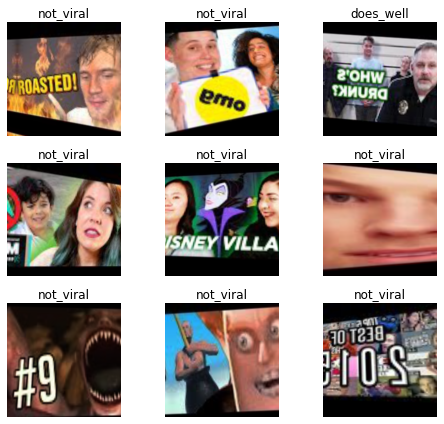

In [0]:
path = Path('./Youtube_Viral_data_scraper-master')

bs = 64
size = 224
num_workers = 0

tfms = get_transforms()                               #Do standard data augmentation
data = (ImageList.from_folder(path)               #Get data from path
        .split_by_rand_pct()                        #Randomly separate 20% of data for validation set
        .label_from_folder()                          #Label based on dir names
        .transform(tfms, size=size)                   #Pass in data augmentation
        .databunch(bs=bs, num_workers=num_workers)    #Create ImageDataBunch
        .normalize(imagenet_stats))                   #Normalize using imagenet stats


data.show_batch(rows=3, figsize=(7,6))

data.classes


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-02
Min loss divided by 10: 1.00E-02


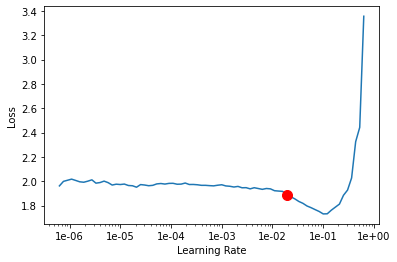

In [0]:
learn = create_cnn(data, models.resnet50, metrics=accuracy, model_dir='/kaggle/working')
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(10, max_lr=slice(1e-02, 1e-01))

epoch,train_loss,valid_loss,accuracy,time
0,0.952564,1.009819,0.790094,00:56
1,1.000193,0.823838,0.740566,00:56
2,0.852033,0.688302,0.795991,00:55
3,0.758352,0.764924,0.807783,00:55
4,0.728015,0.757741,0.803066,00:56
5,0.683937,0.695585,0.790094,00:56
6,0.642552,0.617090,0.807783,00:56
7,0.599910,0.599268,0.810142,00:56
8,0.571800,0.609492,0.807783,00:56
9,0.538442,0.700852,0.808962,00:56


In [0]:
learn.save('./stage-1')
learn.export(Path('/content/stage-1.pkl'))

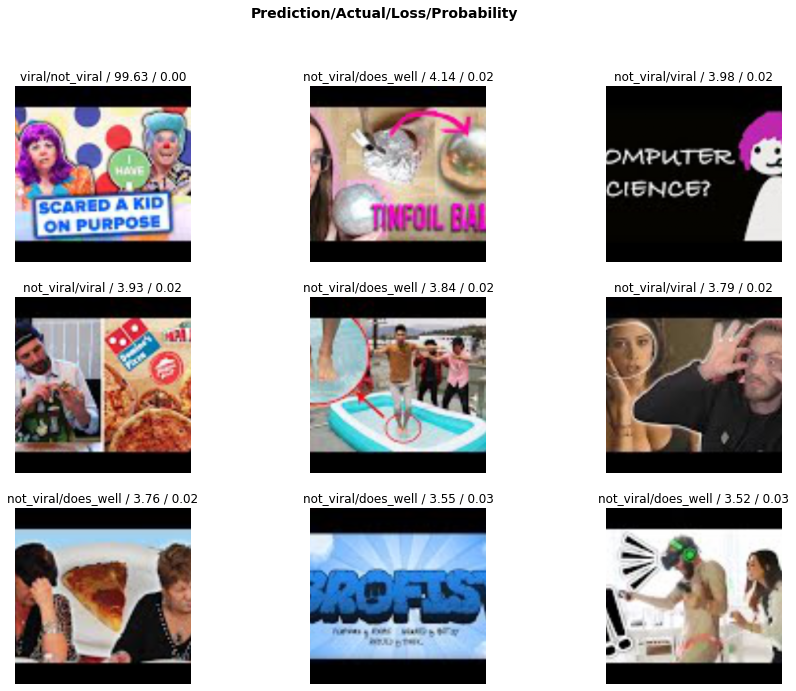

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

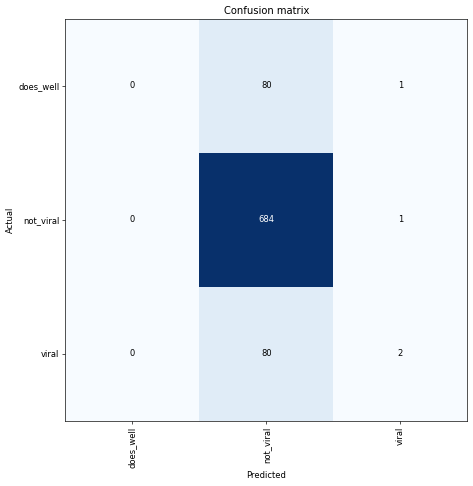

In [0]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [0]:
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))


The accuracy is 0.8089622855186462 %.


In [0]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.7005239353365278


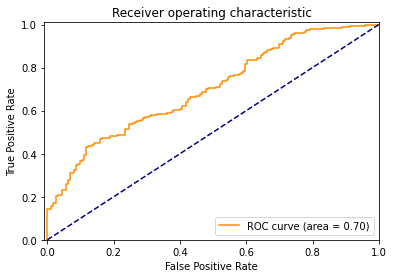

In [0]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


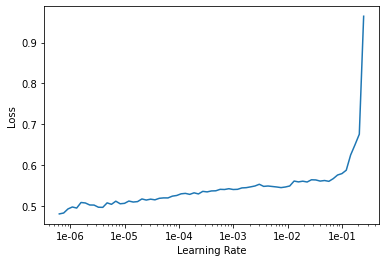

In [0]:
learn.load('/content/stage-1')
learn.unfreeze()
learn.lr_find()

learn.recorder.plot(suggestions = True)

In [0]:
learn.fit_one_cycle(cyc_len=12, max_lr=slice(1e-06))

epoch,train_loss,valid_loss,accuracy,time
0,0.526582,1.322932,0.807783,00:58
1,0.522612,1.243137,0.808962,00:58
2,0.523649,1.054201,0.808962,00:57
3,0.524977,0.654483,0.808962,00:57
4,0.521118,1.170516,0.808962,00:57
5,0.516530,0.922858,0.808962,00:57
6,0.520148,1.230476,0.808962,00:57
7,0.523870,0.904390,0.807783,00:57
8,0.513275,1.382174,0.807783,00:57
9,0.513928,1.375065,0.807783,00:57


In [0]:
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.8089622855186462 %.
